In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N=100
D=2

X = np.random.randn(N,D)


In [3]:
# center the first 50 points at (-2,-2)

X[:50,:] = X[:50,:] - 2*np.ones((50,D)) #-2*np.ones((50,D)) is a matrix 50xD of -2's therefore is 
#centered at (-2,-2) 

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))#-2*np.ones((50,D)) is a matrix 50xD of 2's therefore is 
#centered at (2,2)

# Targets: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# Add a column of ones for the bias term
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1) #Change the size of X, to include the bias term

# randomly initialize the weights
w = np.random.randn(D + 1)

In [5]:

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T, Y))

9.270356828408286


In [6]:
# try it with our closed-form solution
w = np.array([0, 4, 4]) #This is because 2-(-2)=4, 2-(-2)=4, and b because the gaussians have
#the same amount of samples

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

# calculate the cross-entropy error
print(cross_entropy(T, Y))

0.018955272865611977


The error changes a lot!

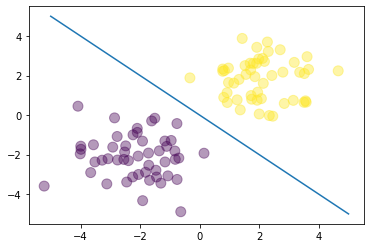

In [18]:
#Let's visualize 
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.4 ) #This shows the two gaussian dis. centered at (-2,-2) and (2,2)
#Now let's draw the line that we found 
x_axis = np.linspace(-5, 5, 100) # because the closed-form solution... y=-x
y_axis = -x_axis
plt.plot(x_axis,y_axis)
plt.show()
